# Lecture 6

## Basic Combinatorics

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

Consider again our experiment where we flip a coin 20 times:

In [2]:
def coinsim2(num_sims=1000000, flips=20, threshold=6):

    results=npr.randint(2,size=(num_sims,flips))
    num_heads=np.sum(results,axis=1)

    vals,counts=np.unique(num_heads,return_counts=True)
    plt.bar(vals,counts/num_sims)
    for i in range(len(vals)):

        print(vals[i],counts[i]/num_sims)

0 1e-06
1 1.6e-05
2 0.00016
3 0.001084
4 0.004566
5 0.014776
6 0.036836
7 0.073681
8 0.120295
9 0.160882
10 0.176037
11 0.159771
12 0.119999
13 0.073973
14 0.037128
15 0.014865
16 0.004673
17 0.001064
18 0.000176
19 1.7e-05


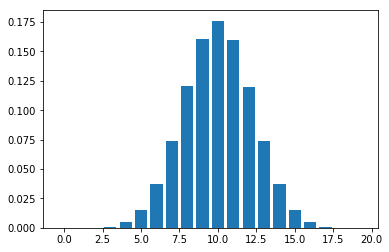

In [3]:
coinsim2()

This is an example of a **combined experiment**. 

**Definition** A **combined experiment** or **sequential experiment** is an experiment that consists of a sequence of subexperiments. When ordered, the subexperiments may depend on the outcome of previous subexperiments.

How can we determine the observed relative frequencies analytically for this combined experiment? Let's put together what we know so far:

1. The experiment of flipping a fair coin is a fair experiment with 2 outcomes:
$$S= \{H,T\}$$
Let $P(H)$ and $P(T)$ denote the probability of getting heads and tails, respectively. Then
$$P(H)=P(T)= \frac{1}{|S|}=\frac 1 2$$
2. The combined experiment of flipping a fair coin 20 times has the sample space 
$$S_C=\{H,T\} \times \{H,T\} \times \ldots \times \{H,T\}~~~~\mbox{(Cartesian product of 20 sets)}$$

We will need some more knowledge to calculate the probabilities shown above. First:

**For a combined experiment, if all of the subexperiments have equally likely outcomes, then the outcomes of the combined experiment (meaning the members of $S_C$ above) are also equally likely.**

How does this relate to what we observed? The number of heads is not an outcome of the combined experiment. 

An outcome of the combined experiment is a sequence of 20 heads and tails values; for instance, $(H,T,T,H,H,H,T,H,T,H,H,T,T,T,T,H,H,T,H,H)~$ is an outcome of the combined experiment.

Enumerating all the outcomes of the combined experiment would be **painful**. Instead let's start by counting the number of outcomes. 

Each outcome is a 20-tuple, and each element of the 20-tuple may take 1 of 2 values. Thus, the number of outcomes is
$$
\left|S_C\right| =
$$


In [4]:
2**20

1048576

Thus, the probability of any particular outcome $s \in S_C$ is
$$
P(s) = \frac{1}{\left|S_C \right|} =
$$

In [5]:
1/2**20

9.5367431640625e-07

## Sampling with Replacement and with Ordering

This is an example of **Sampling with Replacement and with Ordering**. We are choosing 20 ordered values from the set $\{H,T\}$, and after we choose a value, that value still remains in the set.

Consider choosing $k$ values from a set of $n$ values. The result is a $k$-tuple: $(x_1, x_2, \ldots, x_k)$, 
where $x_i \in A, \forall i=1,2,\ldots, k$. 

Thus, this is a combined experiment with $|S_1|=|S_2|=\ldots=|S_k|=|A|\equiv n$.\\


$\Rightarrow$ number of distinct ordered $k$-tuples is 
$n^k$


Getting a certain number of Heads in the combined experiment is an **event** because in general it maps to multiple outcomes. For instance, the event that we get exactly one Head on 20 flips consists of these outcomes: 

In [6]:
print("{")
for i in range(20):
    print("(",end="")
    for j in range(20):
        if j==i:
            print("H",end="")
        else:
            print("T",end="")
        if j!=19:
            print(",",end="")
    print("),")
print("}")            

{
(H,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,H,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,H,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,H,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,H,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,H,T,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,H,T,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,H,T,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,H,T,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,H,T,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,H,T,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,H,T,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,H,T,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,H,T,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,T,H,T,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,H,T,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,H,T,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,H,T,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,H,T),
(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,H),
}


One of the first things we often do in working with probabilities is introduce notation to keep our work from getting too messy.

Let $H_i$ be the event that $i$ heads occur on 20 flips of a fair coin.

Thus, there are 20 outcomes in the event $H_1$. Since this is a fair experiment,
$$
P(H_1) = \frac{20}{1048576} \approx 2 \times 10^{-5}
$$

There are also 20 outcomes for the event "number of Tails = 1", which is the same as $H_{19}$, so 
$$
P(H_{19}) = \frac{20}{1048576} \approx 2 \times 10^{-5}
$$

It is also easy to see that there is 1 outcome for the event $H_0$ and 1 outcome for the event $H_{20}$, so
$$
P(H_0) = P(H_{20}) = \frac{1}{1048576} \approx 1 \times 10^{-6}
$$

Although we could generalize the code above to enumerate other events, it would require recursion to keep the code clean, and the number of outcomes would quickly get large. 

Instead, we want to learn how to **count** the number of outcomes in the events without having to enumerate them

Consider the problem of counting the number of outcomes in the event $H_2$

An outcome in $H_2$ looks like 
$$
(T,T,T,T,T,T,T,H,T,T,T,T,T,T,H,T,T,T,T,T)
$$

Note that we can express this in compressed notation by just recording where the 2 Heads are: (7,14)

(Equivalently, we could specify where the 18 Tails are)

So, determining the number of ways there are to have 2 heads out of 20 is  the same as determining the number of ways there are to specify a 2-tuple  $(h_1,h_2)$ such that:
* $h_i \in \{0,1,\ldots 19\}$

* $h_1 \ne h_2$

(This is actually not quite enough restrictions, but let's start counting here):




How many ways are there to choose $(h_1,h_2)$ according to the restrictions above?

Suppose we choose $h_1$ first. It can take on any of 20 values.

Then $h_2$ can take on any of the other 19 values

So, there are $20 \cdot 19 =380$ such pairs

Why is this not the right number?

I chose (14,7), and I also chose (7,14). These are the same thing, and we are counting this as two outcomes when this is really just one outcome.

## Sampling without replacement and with ordering
In general, the number of ways to choose $k$ items from $n$ items **without replacement** and **with ordering** is
$$
n \cdot (n-1) \cdot \ldots \cdot (n-k+1) = \frac{n!}{(n-k)!}
$$

Here, with ordering means that outcomes like $(7,14)$ and $(14,7)$ are both allowed and considered distinct

Note that in counting the number of ways that 2 Heads can occur in 20 flips, (7,14) represents the same thing as (14,7). 

So, if we determine the number of **ordered** ways to choose 2 unique values out of 20, we have **overcounted** by a factor of 2

Thus, the correct number of outcomes in $E_2$ is
$$
\left|E_2 \right| = \frac{20 \cdot 19}{2} = 190
$$
Let's check:

In [7]:
count=0
for i in range(20):
    for j in range(i+1,20):
        print("(",i,",",j,")",sep="",end="  ")
        count+=1
    print("")
print("|E2|=",count)

(0,1)  (0,2)  (0,3)  (0,4)  (0,5)  (0,6)  (0,7)  (0,8)  (0,9)  (0,10)  (0,11)  (0,12)  (0,13)  (0,14)  (0,15)  (0,16)  (0,17)  (0,18)  (0,19)  
(1,2)  (1,3)  (1,4)  (1,5)  (1,6)  (1,7)  (1,8)  (1,9)  (1,10)  (1,11)  (1,12)  (1,13)  (1,14)  (1,15)  (1,16)  (1,17)  (1,18)  (1,19)  
(2,3)  (2,4)  (2,5)  (2,6)  (2,7)  (2,8)  (2,9)  (2,10)  (2,11)  (2,12)  (2,13)  (2,14)  (2,15)  (2,16)  (2,17)  (2,18)  (2,19)  
(3,4)  (3,5)  (3,6)  (3,7)  (3,8)  (3,9)  (3,10)  (3,11)  (3,12)  (3,13)  (3,14)  (3,15)  (3,16)  (3,17)  (3,18)  (3,19)  
(4,5)  (4,6)  (4,7)  (4,8)  (4,9)  (4,10)  (4,11)  (4,12)  (4,13)  (4,14)  (4,15)  (4,16)  (4,17)  (4,18)  (4,19)  
(5,6)  (5,7)  (5,8)  (5,9)  (5,10)  (5,11)  (5,12)  (5,13)  (5,14)  (5,15)  (5,16)  (5,17)  (5,18)  (5,19)  
(6,7)  (6,8)  (6,9)  (6,10)  (6,11)  (6,12)  (6,13)  (6,14)  (6,15)  (6,16)  (6,17)  (6,18)  (6,19)  
(7,8)  (7,9)  (7,10)  (7,11)  (7,12)  (7,13)  (7,14)  (7,15)  (7,16)  (7,17)  (7,18)  (7,19)  
(8,9)  (8,10)  (8,11)  (8,12)  (8,13)  (8,14

Now, let's try to count $|E_3|$. We know the number of ways to choose 3 **ordered** values from 20 without replacement is
$$20 \cdot 19 \cdot 18 = $$

In [8]:
20*19*18

6840

But how many repeats are there if we want to know the number of unordered sets? Let's consider how many ways we can arrange (1,2,3):



(1,2,3)
(1,3,2)
(2,1,3)
(2,3,1)
(3,1,2)
(3,2,1)

So, there are 6

Note that the number of ways to order 3 things is the same as the number of order ways to choose 3 items from a set of 3

## Permutations

**Definition** The number of *permutations* of $n$ objects is the number of orderings of those $n$ objects, and can be calculated as
$$
n \cdot (n-1) \cdot (n-2) \cdot \ldots \cdot 2 \cdot 1 \\
= n!
$$


**PYTHON technique:** To determine $n!$ in Python, use the SciPy library:\\


In [15]:
from scipy.special import factorial

In [16]:
factorial(3)

array(6.)

In [18]:
factorial(3,exact=True)

6

In [20]:
factorial(100)

array(9.33262154e+157)

Finally, we are ready to determine $|H_3|$, which is $20 \cdot 19 \cdot 18$ divided by the number of orderings of 3 items, which is $3!=6$, so
\begin{align*}
\left|H_3\right| &= \frac{20!}{(20-3)!}\frac{1}{3!} \\
&=\frac{20 \cdot 19 \cdot 18}{6} 
&= 1140
\end{align*}

Moreover, the formula for general $H_k$ follows directly:

## Sampling without Replacement and without Ordering

The number of ways to choose $k$ items from a set of $n$ items without replacement and without ordering is
$$
 \frac{n!}{(n-k)!k!}
$$

The value on the RHS of the equation can also be expressed as
$$
\binom{n}{k} = C^{n}_{k}
$$
and is know as the **binomial coefficient**

**PYTHON technique** To determine $\binom{n}{k}$ in Python, you can use the SciPy library:

In [10]:
from scipy.special import binom

In [29]:
binom(20,3)

1140.0

Thus, the probability of any event $H_k$ is 
$$
P(H_k) = \frac{|H_k|}{|S_c|} = \frac{\binom{20}{k}}{2^{20}}
$$

Let's put it all together and compare with our simulation:

In [11]:
def coinsim3(num_sims=1000000, flips=20, threshold=6):

    results=npr.randint(2,size=(num_sims,flips))
    num_heads=np.sum(results,axis=1)

    vals,counts=np.unique(num_heads,return_counts=True)
    plt.bar(vals,counts/num_sims,alpha=0.4)
    
    analytic=[]
    for k in range(21):
        analytic+=[binom(20,k)/(2**20)]
        
    plt.stem(range(21),analytic,'g')
    for i in range(len(vals)):

        print(vals[i],counts[i]/num_sims)

0 1e-06
1 1.8e-05
2 0.000162
3 0.001091
4 0.004805
5 0.014913
6 0.037149
7 0.074103
8 0.120343
9 0.160937
10 0.175785
11 0.159242
12 0.120047
13 0.07402
14 0.036661
15 0.014813
16 0.004639
17 0.001073
18 0.000178
19 1.9e-05
20 1e-06


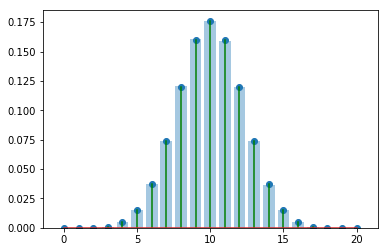

In [30]:
coinsim3()

1. First count the number of events in the outcome space
2. divide by the total number of things in the sample space

**In-class Assignment**

Poker Dice is played by rolling a fair die 5 times and recording the ordered sequence of results. 

1) How many different hands are there? Use itertools to count them.

2) How many ways are there make the hand "one pair", which consists of two dice with the same value and three other dice with 3 other values? (Give an analytical expression in factored form, using binom() or factorial() where necessary)

3) What is the probability of getting the hand "one pair"? You can use the simulation at the end of this document to compare with your answer. (Give an analytical expression in factored form, using binom() or factorial() where necessary)

In [13]:
import itertools

In [98]:
num_sims=10000000
event_count=0
for sim in range(num_sims):
    hand=npr.randint(1,7,size=5)
#     print(hand)
    counts=np.bincount(hand)
#     print(counts)
    counts=np.sort(counts)
#     print(counts)
    if counts[-1]==2 and counts[-2]==1:
        event_count+=1
#         print("One pair")
#     print()

print("Prob(one pair)=~",event_count/num_sims)


Prob(one pair)=~ 0.4627871


# 1.

In [160]:
E = list(range(1,7))
hands = list(itertools.product(E,E,E,E,E))
num_hands= len(hands)
print('There are exactly', num_hands, 'hands.')

There are exactly 7776 hands.


# 2.

In [158]:
# of 5 dices, select 2 to make a pair (5 choose 2)
# then choose which value they will both take on (6 choose 1)
# then choose the remaining values that the other die will take on from the remaining 5 values (5 choose 3)
# multiply the remaining values for the die by the possible permutations that these can be ordered in
one_pair_hands = int(binom(5,2)*binom(6,1)*binom(5,3)*factorial(3))
print('There are',one_pair_hands,'ways to make the hand "one pair."')

There are 3600 ways to make the hand "one pair."


# 3.

In [159]:
one_pair_prob = round(one_pair_hands/num_hands,3)
print('The probability of getting the hand "one pair" is ~',one_pair_prob,".",sep="")

The probability of getting the hand "one pair" is ~0.463.
